In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd


dataSell = pd.read_csv("/content/drive/MyDrive/NUCLIO/Nuclio-Capstone/data_dsmarket/data_dsmarket/item_sales.csv")

# Si solo queremos una tienda
#dataSell = dataSell[dataSell["region"] == "New York"]


In [4]:
# función para relacionar días semana
def days2week(days):
   weekStart = 201105
   dayStart = "Saturday"
   dayStartInt = 0

   lastWeekYear = {}
   lastWeekYear[2011] = 52
   lastWeekYear[2012] = 53
   lastWeekYear[2013] = 52
   lastWeekYear[2014] = 52
   lastWeekYear[2015] = 52
   lastWeekYear[2016] = 52

   weekDays = 7

   week = weekStart
   dayInt = dayStartInt

   days2week = {}
   nDays = days
   for i in range(1, nDays + 1):
     days2week[i] = week
     dayInt += 1
     #print(dayInt)
     if dayInt == 7:
       dayInt = 0
       #print(dayInt)
       week += 1

       currentYear = int(str(week)[0:4])
       currentWeek = int(str(week)[4:])

       if (lastWeekYear[currentYear] == currentWeek):
         week = (currentYear + 1) * 100 


   return days2week

d2Week=days2week(1913)

In [5]:
dataCol = dataSell.columns

dayCol = [col for col in dataCol if 'd_' in col]
noDayCol = [col for col in dataCol if not 'd_' in col]
noDayCol

['id', 'item', 'category', 'department', 'store', 'store_code', 'region']

In [6]:
#Pasamos días de col a filas
dataSell = dataSell.melt(id_vars = noDayCol,
                 var_name = "day",
                 value_name = "sell")

In [7]:
# Para todas las tiendas agrupamos por item y día; si solo hay una tienda se puede omitir
dataSell = dataSell.groupby(['item', 'day']).sum().reset_index()

In [8]:
# Pasamos los días a numéricos
dataSell['day'] = dataSell['day'].str[2:]
dataSell

,item,day,sell
0,ACCESORIES_1_001,1,0
1,ACCESORIES_1_001,10,0
2,ACCESORIES_1_001,100,0
3,ACCESORIES_1_001,1000,4
4,ACCESORIES_1_001,1001,5
...,...,...,...
5832732,SUPERMARKET_3_827,995,0
5832733,SUPERMARKET_3_827,996,0
5832734,SUPERMARKET_3_827,997,0
5832735,SUPERMARKET_3_827,998,0


In [9]:
# Relacionamos días-semana
weekCol = []
for row in dataSell["day"]:
  weekCol.append(d2Week[int(row)])

dataSell["week"] = weekCol

In [10]:
# Agrupamos item por semanas
dataGroup = dataSell.groupby(['item', 'week']).sum().reset_index()

In [11]:
# Nos quedamos los 3 más vendidos por semana
dataGroupMax = dataGroup.groupby(['week']).apply(lambda x: x.nlargest(3, 'sell')).reset_index(drop=True)

In [ ]:
#Pintamos NY
x = dataGroupMax['week'].to_numpy()
y = dataGroupMax['sell'].to_numpy()
z = dataGroupMax['item'].to_numpy()
import numpy as np
zUniq = np.unique(z)
colorLegend = {}
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
for i in range(len(zUniq)):
  x = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'week'].to_numpy()
  y = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'sell'].to_numpy()
  plt.plot(x, y, '-o')
  colorLegend[zUniq[i]] = ax.get_lines()[-1].get_color()
ax.legend(labels = zUniq)
fig.suptitle('NY', fontsize=16)

In [ ]:
#Pintamos PHI
x = dataGroupMax['week'].to_numpy()
y = dataGroupMax['sell'].to_numpy()
z = dataGroupMax['item'].to_numpy()
import numpy as np
zUniq = np.unique(z)
colorLegend = {}
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
for i in range(len(zUniq)):
  x = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'week'].to_numpy()
  y = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'sell'].to_numpy()
  plt.plot(x, y, '-o')
  colorLegend[zUniq[i]] = ax.get_lines()[-1].get_color()
ax.legend(labels = zUniq)
fig.suptitle('PHI', fontsize=16)

In [ ]:
#Pintamos BOS
x = dataGroupMax['week'].to_numpy()
y = dataGroupMax['sell'].to_numpy()
z = dataGroupMax['item'].to_numpy()
import numpy as np
zUniq = np.unique(z)
colorLegend = {}
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
for i in range(len(zUniq)):
  x = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'week'].to_numpy()
  y = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'sell'].to_numpy()
  plt.plot(x, y, '-o')
  colorLegend[zUniq[i]] = ax.get_lines()[-1].get_color()
ax.legend(labels = zUniq)
fig.suptitle('BOS', fontsize=16)

Text(0.5, 0.98, 'ALL')

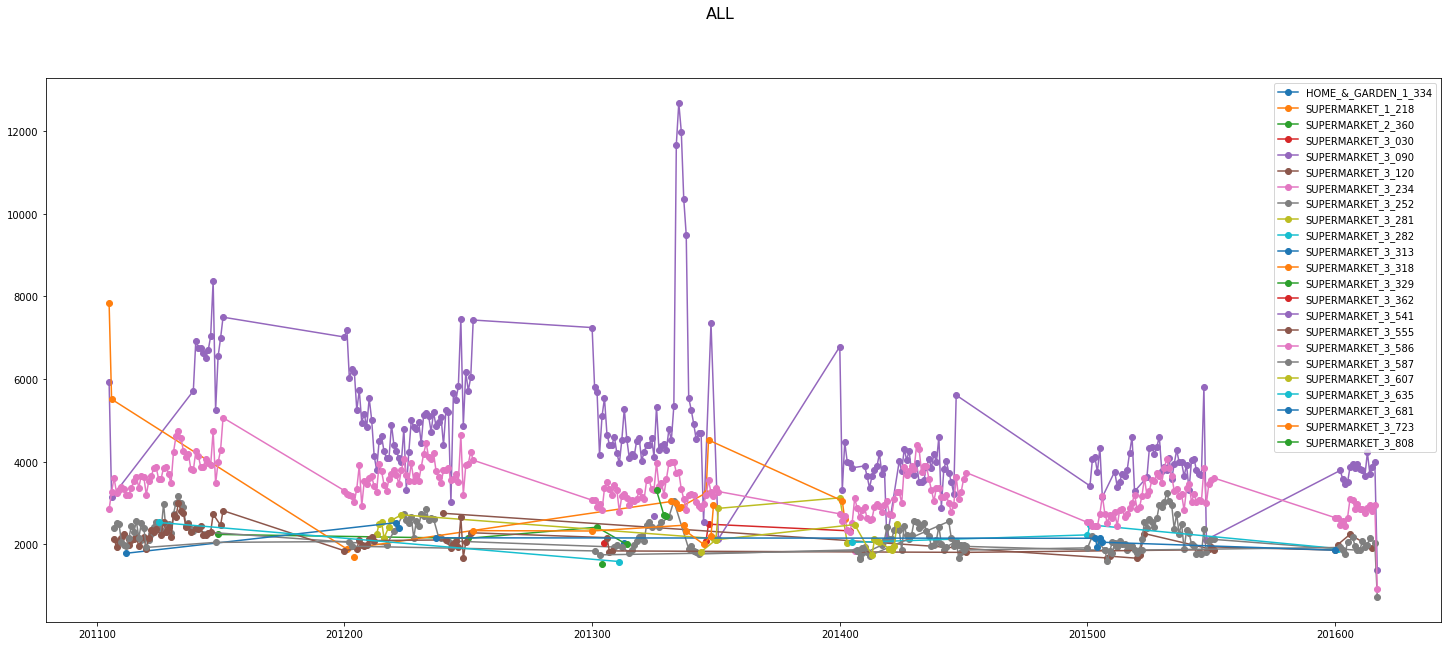

In [12]:
#Pintamos global
x = dataGroupMax['week'].to_numpy()
y = dataGroupMax['sell'].to_numpy()
z = dataGroupMax['item'].to_numpy()
import numpy as np
zUniq = np.unique(z)
colorLegend = {}
fig = plt.figure(figsize=(25,10))
ax = plt.gca()
for i in range(len(zUniq)):
  x = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'week'].to_numpy()
  y = dataGroupMax.loc[dataGroupMax['item'] == zUniq[i], 'sell'].to_numpy()
  plt.plot(x, y, '-o')
  colorLegend[zUniq[i]] = ax.get_lines()[-1].get_color()
ax.legend(labels = zUniq)
fig.suptitle('ALL', fontsize=16)